### OLS (Ordinary Least Square) Task  

#### 서울 자전거 대여 수 분석

- Date: 대여 날짜
- Rented Bike Count: 대여 수
- Hour: 대여 시간
- Temperature(°C): 온도(섭씨)
- Humidity(%): 습도 (%)
- Wind speed (m/s): 풍속 (m/s)
- Visibility (10m): 가시거리 (10m)
- Dew point temperature(°C): 이슬점(°C), 이슬점이 낮으면 10~15°C 정도로 공기가 편안하게 느껴진다.
- Solar Radiation (MJ/m2): 태양복사 (MJ/m2)
- Rainfall(mm): 강우량/비 (mm)
- Snowfall (cm): 강우량/눈 (cm)
- Seasons: 계절
- Holiday: 공휴일
- Functioning Day: 운영 여부

In [113]:
import chardet

rawdata = open('./datasets/seoul_bicycle.csv', 'rb').read()
result = chardet.detect(rawdata)
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [114]:
import pandas as pd

b_df = pd.read_csv('./datasets/seoul_bicycle.csv', encoding='ISO-8859-1')
b_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [115]:
group_b_df = b_df[['Date', 'Rented Bike Count']].groupby('Date').sum('Rented Bike Count').reset_index()
group_b_df

,Date,Rented Bike Count
0,01/01/2018,4290
1,01/02/2018,5377
2,01/03/2018,5132
3,01/04/2018,17388
4,01/05/2018,26820
...,...,...
360,31/05/2018,31681
361,31/07/2018,22897
362,31/08/2018,27817
363,31/10/2018,21545


In [116]:
group_b_df['Date'] = pd.to_datetime(group_b_df['Date'], dayfirst=True)
group_b_df

,Date,Rented Bike Count
0,2018-01-01,4290
1,2018-02-01,5377
2,2018-03-01,5132
3,2018-04-01,17388
4,2018-05-01,26820
...,...,...
360,2018-05-31,31681
361,2018-07-31,22897
362,2018-08-31,27817
363,2018-10-31,21545


In [117]:
group_b_df.Date.duplicated().sum()

0

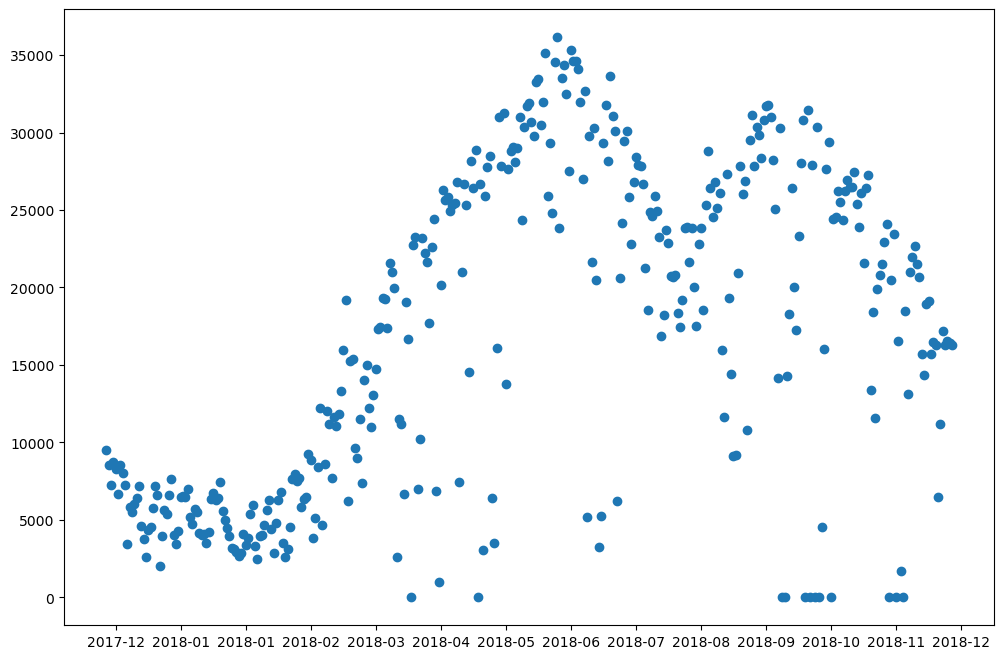

In [118]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 8))


date_format = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.xaxis.set_major_formatter(date_format)
plt.scatter(group_b_df.Date, group_b_df['Rented Bike Count'])
plt.show()

In [119]:
pre_b_df = b_df.drop(labels=['Date', 'Seasons', 'Holiday', 'Functioning Day'], axis=1)
pre_b_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [120]:
pre_b_df.corr()['Rented Bike Count'].sort_values(ascending=False)[1:]

Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64

In [121]:
pre_b_df = pre_b_df.drop(labels=['Wind speed (m/s)', 'Snowfall (cm)'], axis=1)
pre_b_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm)
0,254,0,-5.2,37,2000,-17.6,0.0,0.0
1,204,1,-5.5,38,2000,-17.6,0.0,0.0
2,173,2,-6.0,39,2000,-17.7,0.0,0.0
3,107,3,-6.2,40,2000,-17.6,0.0,0.0
4,78,4,-6.0,36,2000,-18.6,0.0,0.0
...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,1894,-10.3,0.0,0.0
8756,764,20,3.4,37,2000,-9.9,0.0,0.0
8757,694,21,2.6,39,1968,-9.9,0.0,0.0
8758,712,22,2.1,41,1859,-9.8,0.0,0.0


In [122]:
pre_b_df = pre_b_df[pre_b_df['Rented Bike Count'] >= 10]
pre_b_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm)
0,254,0,-5.2,37,2000,-17.6,0.0,0.0
1,204,1,-5.5,38,2000,-17.6,0.0,0.0
2,173,2,-6.0,39,2000,-17.7,0.0,0.0
3,107,3,-6.2,40,2000,-17.6,0.0,0.0
4,78,4,-6.0,36,2000,-18.6,0.0,0.0
...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,1894,-10.3,0.0,0.0
8756,764,20,3.4,37,2000,-9.9,0.0,0.0
8757,694,21,2.6,39,1968,-9.9,0.0,0.0
8758,712,22,2.1,41,1859,-9.8,0.0,0.0


array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(°C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>,
        <Axes: title={'center': 'Dew point temperature(°C)'}>],
       [<Axes: title={'center': 'Solar Radiation (MJ/m2)'}>,
        <Axes: title={'center': 'Rainfall(mm)'}>, <Axes: >]], dtype=object)

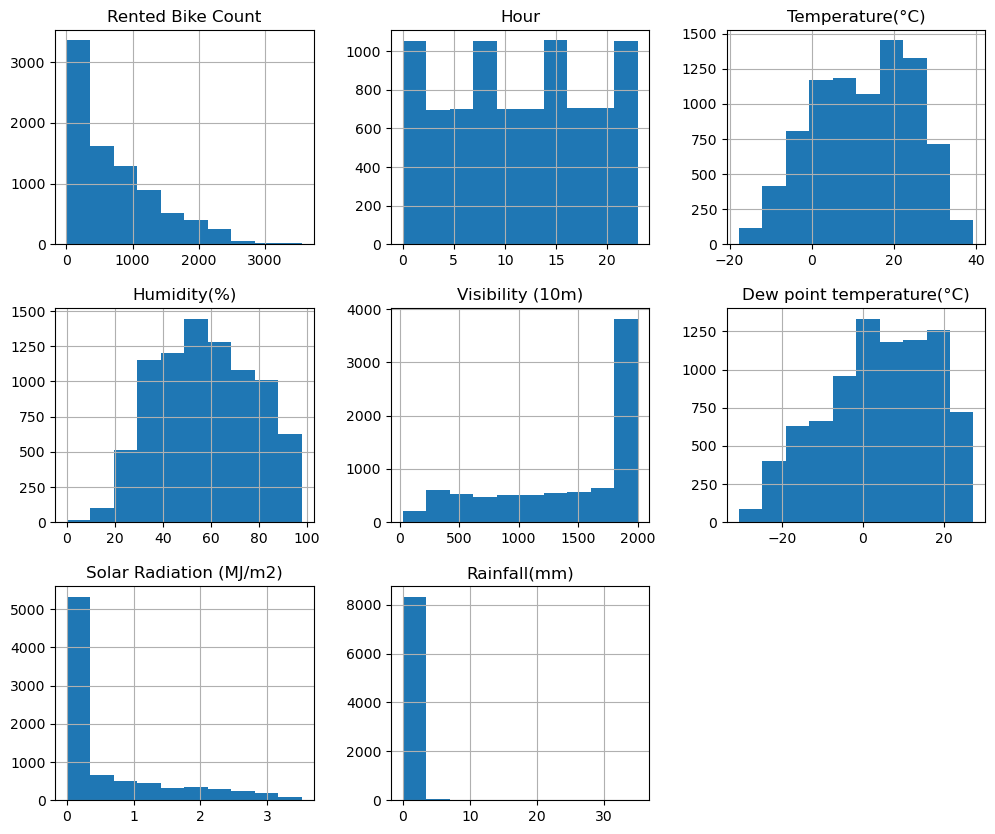

In [123]:
pre_b_df.hist(figsize=(12, 10))

<Axes: >

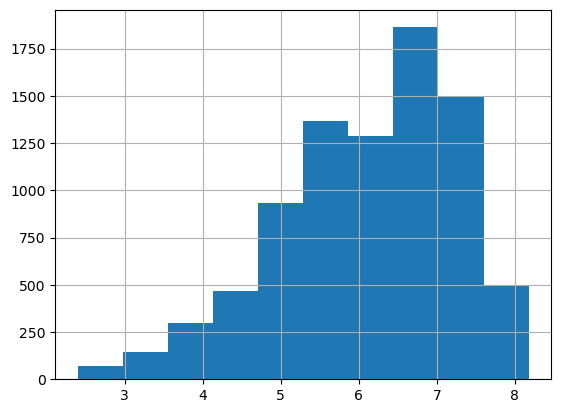

In [124]:
import numpy as np

np.log1p(pre_b_df['Rented Bike Count']).hist()

C:\Users\Admin\AppData\Local\Temp\ipykernel_29588\2354554473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_b_df['Rented Bike Count'] = np.log1p(pre_b_df['Rented Bike Count'])


array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(°C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>,
        <Axes: title={'center': 'Dew point temperature(°C)'}>],
       [<Axes: title={'center': 'Solar Radiation (MJ/m2)'}>,
        <Axes: title={'center': 'Rainfall(mm)'}>, <Axes: >]], dtype=object)

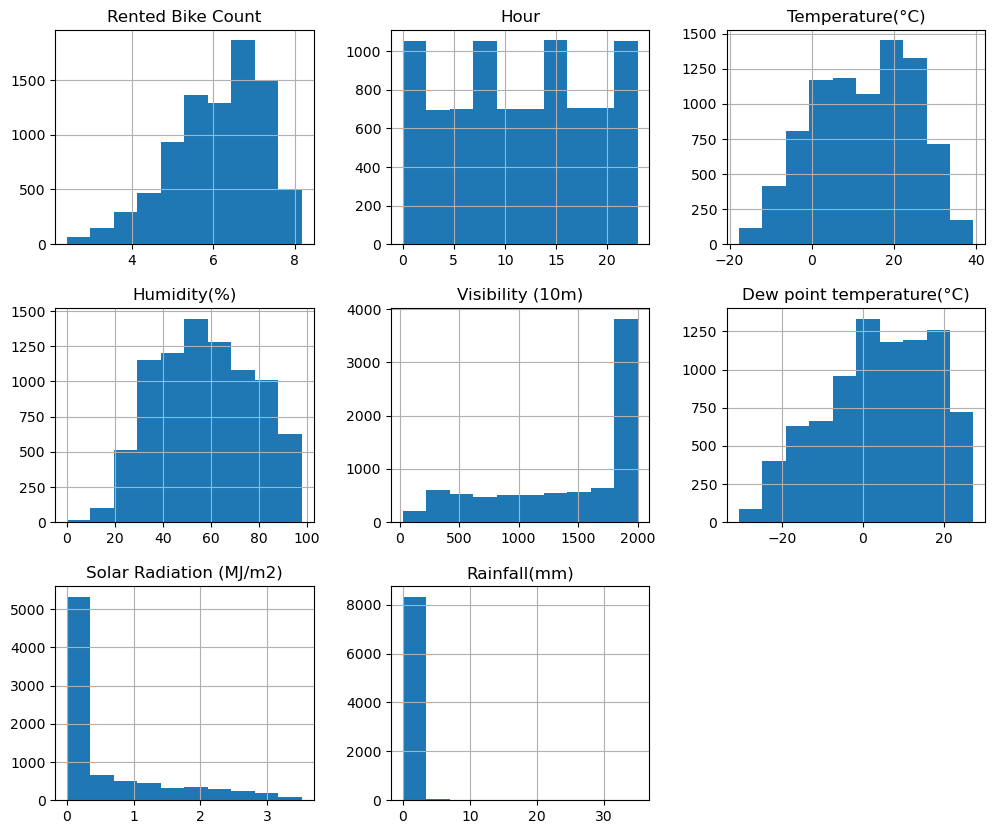

In [125]:
pre_b_df['Rented Bike Count'] = np.log1p(pre_b_df['Rented Bike Count'])
pre_b_df.hist(figsize=(12, 10))

In [126]:
pre_b_df = pre_b_df.drop(labels=['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Visibility (10m)'], axis=1)
pre_b_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Dew point temperature(°C)
0,5.541264,0,-5.2,37,-17.6
1,5.323010,1,-5.5,38,-17.6
2,5.159055,2,-6.0,39,-17.7
3,4.682131,3,-6.2,40,-17.6
4,4.369448,4,-6.0,36,-18.6
...,...,...,...,...,...
8755,6.911747,19,4.2,34,-10.3
8756,6.639876,20,3.4,37,-9.9
8757,6.543912,21,2.6,39,-9.9
8758,6.569481,22,2.1,41,-9.8


array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>],
       [<Axes: title={'center': 'Temperature(°C)'}>,
        <Axes: title={'center': 'Humidity(%)'}>],
       [<Axes: title={'center': 'Dew point temperature(°C)'}>, <Axes: >]],
      dtype=object)

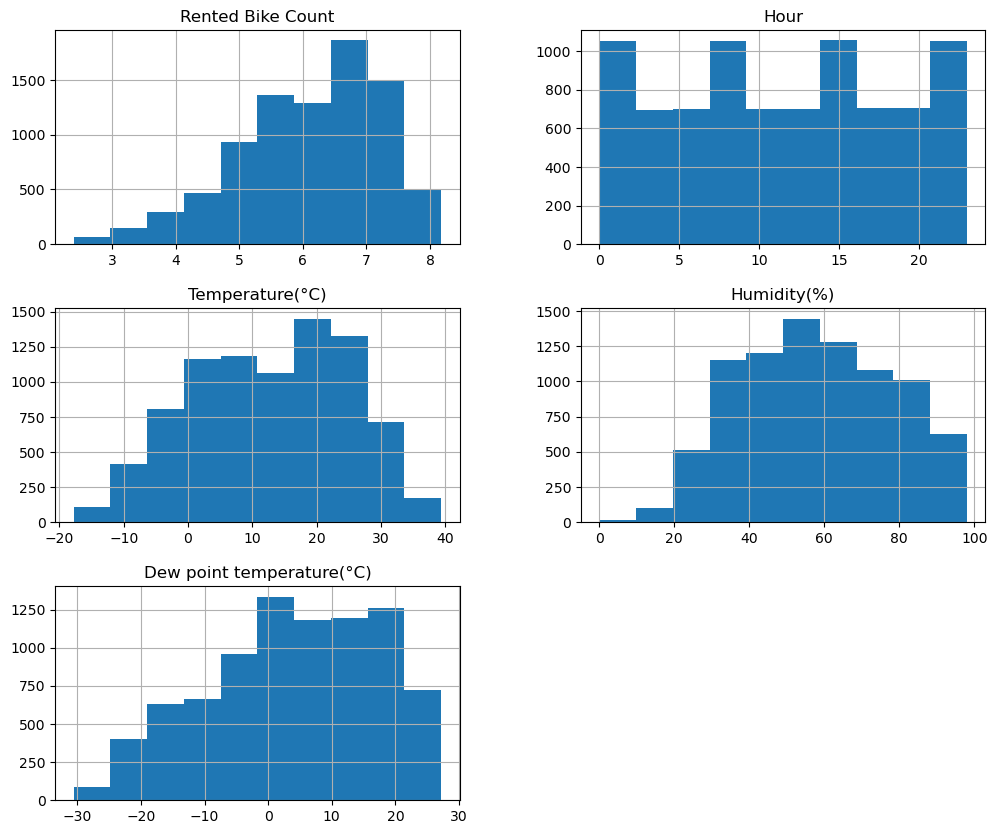

In [127]:
pre_b_df.hist(figsize=(12, 10))

In [128]:
from statsmodels.api import OLS

features, targets = pre_b_df.iloc[:, 1:], pre_b_df.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          1.013e+05
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:58:38   Log-Likelihood:                         -10944.
No. Observations:                8426   AIC:                                  2.190e+04
Df Residuals:                    8422   BIC:                                  2.192e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [130]:
get_vif(features)

,vif_score,feature
0,4.097544,Hour
1,9.241849,Temperature(°C)
2,3.038507,Humidity(%)
3,5.260708,Dew point temperature(°C)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

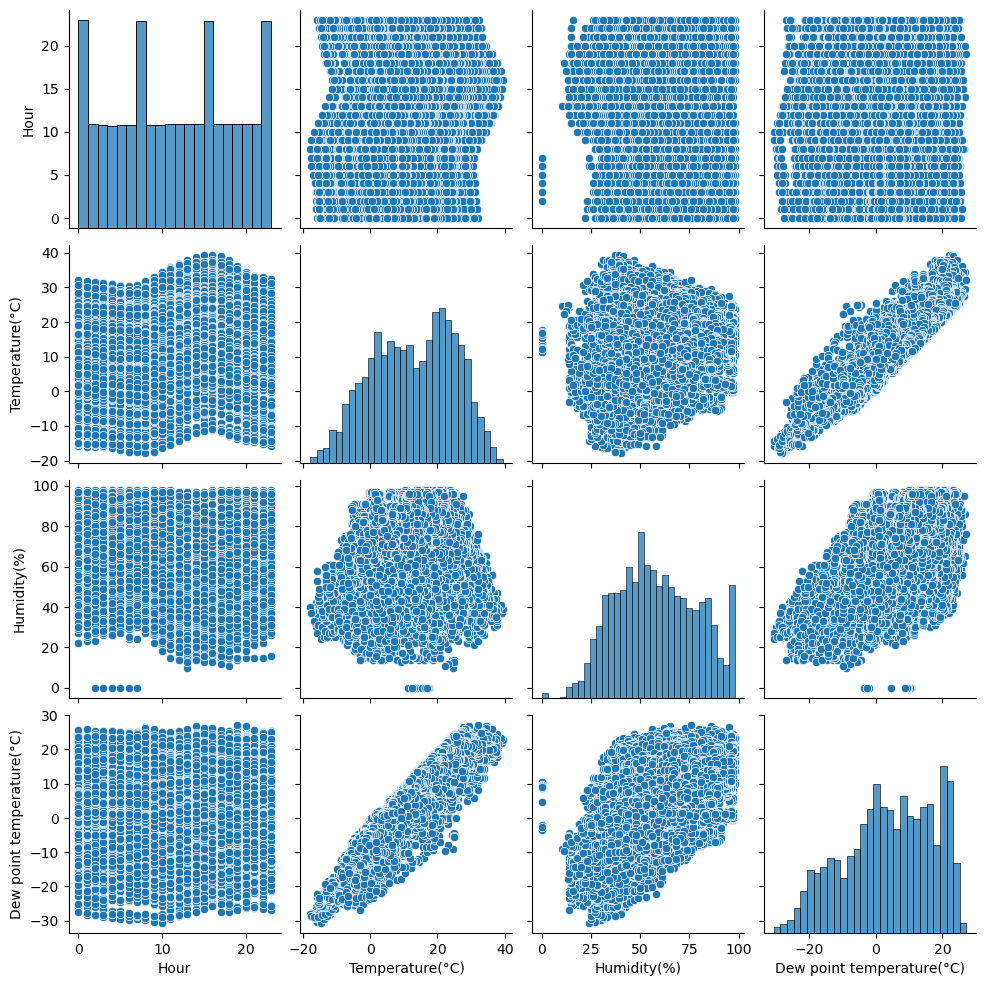

In [131]:
import seaborn as sns

sns.pairplot(features)
plt.show()

In [132]:
pre_b_df.corr()['Rented Bike Count'].sort_values(ascending=False)[1:]

Temperature(°C)              0.575281
Dew point temperature(°C)    0.392263
Hour                         0.383875
Humidity(%)                 -0.261091
Name: Rented Bike Count, dtype: float64

In [133]:
pre_b_df = pre_b_df.drop(labels=['Dew point temperature(°C)'], axis=1)
pre_b_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%)
0,5.541264,0,-5.2,37
1,5.323010,1,-5.5,38
2,5.159055,2,-6.0,39
3,4.682131,3,-6.2,40
4,4.369448,4,-6.0,36
...,...,...,...,...
8755,6.911747,19,4.2,34
8756,6.639876,20,3.4,37
8757,6.543912,21,2.6,39
8758,6.569481,22,2.1,41


In [134]:
features, targets = pre_b_df.iloc[:, 1:], pre_b_df.iloc[:, 0]

In [135]:
get_vif(features)

,vif_score,feature
0,2.599292,Hour
1,2.234852,Temperature(°C)
2,3.037354,Humidity(%)


In [136]:
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          3.361e+04
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:58:42   Log-Likelihood:                         -16552.
No. Observations:                8426   AIC:                                  3.311e+04
Df Residuals:                    8423   BIC:                                  3.313e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [137]:
b_df.loc[:, ['Seasons', 'Holiday', 'Functioning Day']]

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [138]:
columns = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Seasons', 'Holiday', 'Rented Bike Count']

pre_b_df = b_df.iloc[pre_b_df.index].loc[:, columns].reset_index(drop=True)
pre_b_df['Rented Bike Count'] = np.log1p(pre_b_df['Rented Bike Count'])
pre_b_df

,Hour,Temperature(°C),Humidity(%),Seasons,Holiday,Rented Bike Count
0,0,-5.2,37,Winter,No Holiday,5.541264
1,1,-5.5,38,Winter,No Holiday,5.323010
2,2,-6.0,39,Winter,No Holiday,5.159055
3,3,-6.2,40,Winter,No Holiday,4.682131
4,4,-6.0,36,Winter,No Holiday,4.369448
...,...,...,...,...,...,...
8421,19,4.2,34,Autumn,No Holiday,6.911747
8422,20,3.4,37,Autumn,No Holiday,6.639876
8423,21,2.6,39,Autumn,No Holiday,6.543912
8424,22,2.1,41,Autumn,No Holiday,6.569481


In [139]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
result = label_encoder.fit_transform(pre_b_df['Holiday'])
print(result)
print(encoder.classes_)
pre_b_df['Holiday'] = result

[1 1 1 ... 1 1 1]
['Holiday' 'No Holiday']


In [140]:
pre_b_df

,Hour,Temperature(°C),Humidity(%),Seasons,Holiday,Rented Bike Count
0,0,-5.2,37,Winter,1,5.541264
1,1,-5.5,38,Winter,1,5.323010
2,2,-6.0,39,Winter,1,5.159055
3,3,-6.2,40,Winter,1,4.682131
4,4,-6.0,36,Winter,1,4.369448
...,...,...,...,...,...,...
8421,19,4.2,34,Autumn,1,6.911747
8422,20,3.4,37,Autumn,1,6.639876
8423,21,2.6,39,Autumn,1,6.543912
8424,22,2.1,41,Autumn,1,6.569481


In [141]:
pre_b_df.Seasons.value_counts()

Seasons
Summer    2205
Winter    2148
Spring    2142
Autumn    1931
Name: count, dtype: int64

In [142]:
def change_seasons(season):
    if season == 'Spring':
        return 0
    if season == 'Summer':
        return 1
    if season == 'Autumn':
        return 2
    return 3

In [143]:
pre_b_df['Seasons'] = pre_b_df['Seasons'].apply(change_seasons)
pre_b_df

,Hour,Temperature(°C),Humidity(%),Seasons,Holiday,Rented Bike Count
0,0,-5.2,37,3,1,5.541264
1,1,-5.5,38,3,1,5.323010
2,2,-6.0,39,3,1,5.159055
3,3,-6.2,40,3,1,4.682131
4,4,-6.0,36,3,1,4.369448
...,...,...,...,...,...,...
8421,19,4.2,34,2,1,6.911747
8422,20,3.4,37,2,1,6.639876
8423,21,2.6,39,2,1,6.543912
8424,22,2.1,41,2,1,6.569481


In [144]:
features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          4.529e+04
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:58:52   Log-Likelihood:                         -13326.
No. Observations:                8426   AIC:                                  2.666e+04
Df Residuals:                    8421   BIC:                                  2.670e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [145]:
get_vif(features)

,vif_score,feature
0,3.657459,Hour
1,3.019810,Temperature(°C)
2,7.527542,Humidity(%)
3,3.291734,Seasons
4,10.838956,Holiday


In [146]:
get_vif(features.drop(labels=['Holiday'], axis=1))

,vif_score,feature
0,3.179365,Hour
1,2.853665,Temperature(°C)
2,4.462280,Humidity(%)
3,2.864817,Seasons


In [111]:
pre_b_df = pre_b_df.drop(labels=['Holiday'], axis=1)
pre_b_df

,Hour,Temperature(°C),Humidity(%),Seasons,Rented Bike Count
0,0,-5.2,37,3,254
1,1,-5.5,38,3,204
2,2,-6.0,39,3,173
3,3,-6.2,40,3,107
4,4,-6.0,36,3,78
...,...,...,...,...,...
8421,21,6.8,73,2,907
8422,22,6.2,72,2,894
8423,23,5.0,75,2,687
8424,0,4.2,76,2,626


array([[<Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(°C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Seasons'}>],
       [<Axes: title={'center': 'Holiday'}>,
        <Axes: title={'center': 'Rented Bike Count'}>]], dtype=object)

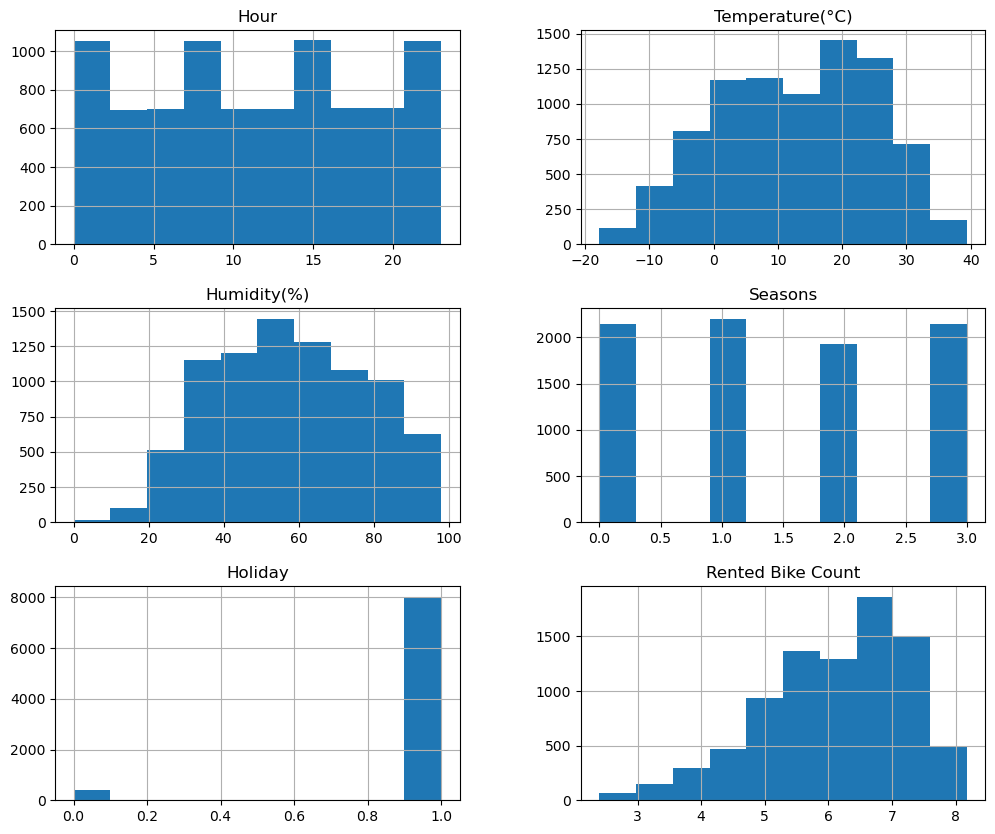

In [148]:
pre_b_df.hist(figsize=(12, 10))

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [153]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [154]:
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 0.6289, RMSE: 0.7930, MSLE: 0.0163, RMSLE: 0.1275, R2: 0.5023
